In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
string = "sum"

In [52]:
funcaoS = eval(string)

In [53]:
funcaoS([1, 2, 3])

6

In [54]:
lena = cv2.imread("lena.png")

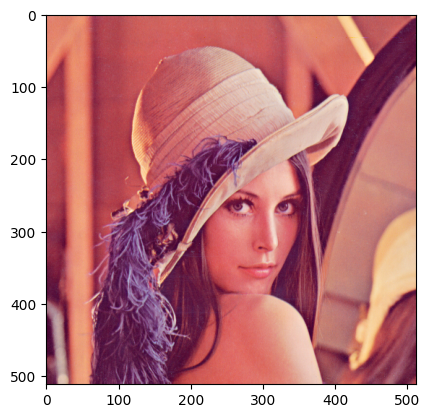

In [55]:
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(lena)
plt.show()

In [56]:
rosto_lena = cv2.imread("rosto_lena.png")
rosto_lena = cv2.cvtColor(rosto_lena, cv2.COLOR_BGR2RGB)

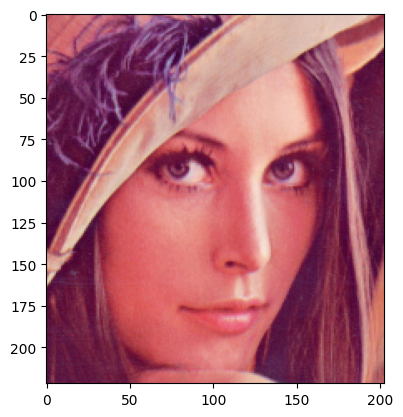

In [57]:
plt.imshow(rosto_lena)
plt.show()

In [58]:
methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR",
        "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

In [59]:
meu_metodo = eval(methods[4])
resultado = cv2.matchTemplate(lena, rosto_lena, meu_metodo)

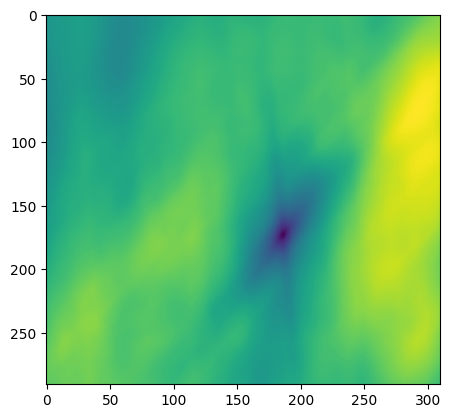

In [60]:
plt.imshow(resultado)
plt.show()

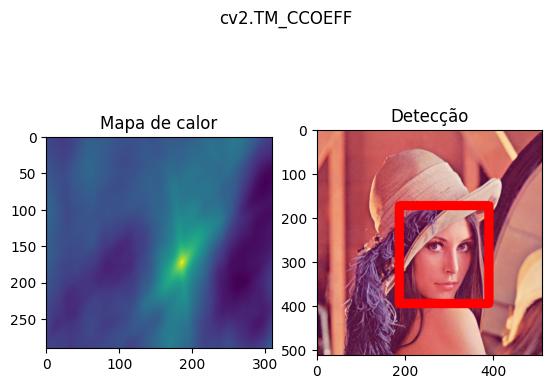

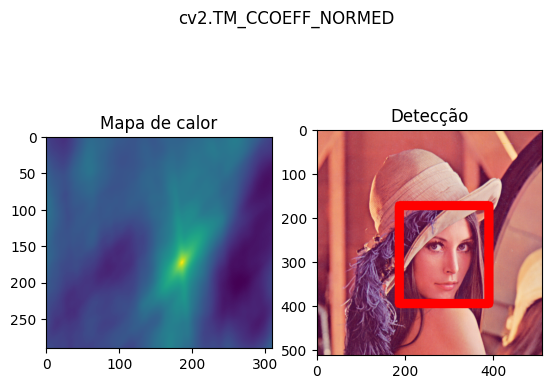

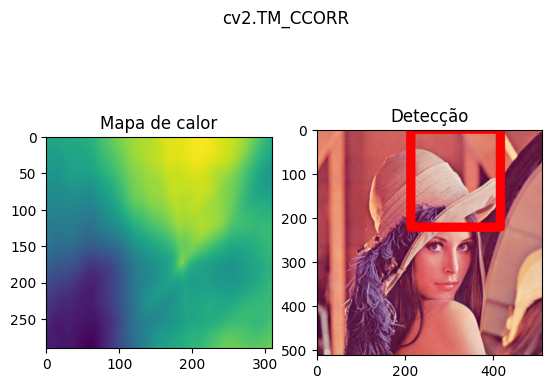

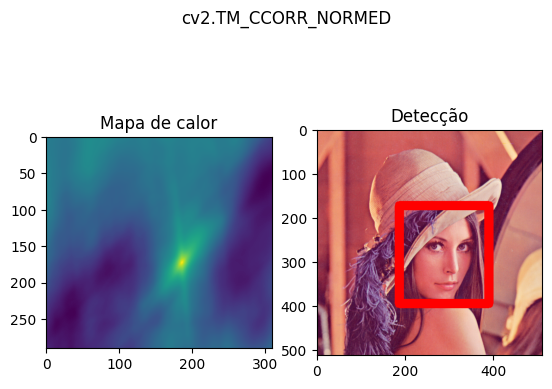

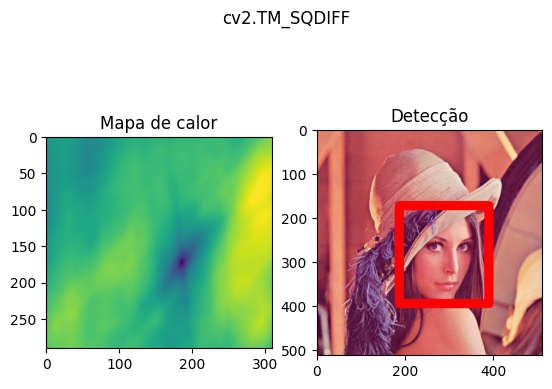

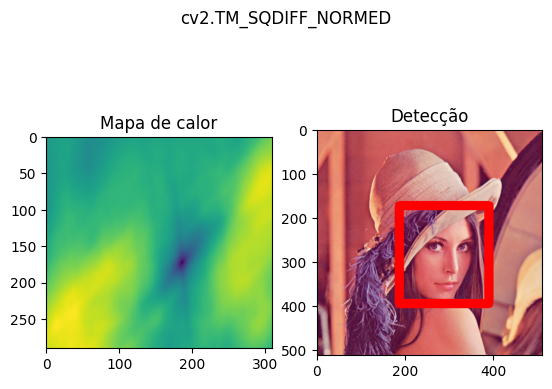

In [61]:
for met in methods:
    copia_lena = lena.copy()
    
    method = eval(met)
    
    resultado = cv2.matchTemplate(lena, rosto_lena, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(resultado)

    if(method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]):
        topo_esquerdo = min_loc
    else:
        topo_esquerdo = max_loc

    altura, largura, canais = rosto_lena.shape

    base_direita = (topo_esquerdo[0] + largura, topo_esquerdo[1] + altura)

    cv2.rectangle(copia_lena, topo_esquerdo, base_direita, (255, 0, 0), 20)

    plt.subplot(121)
    plt.imshow(resultado)
    plt.title("Mapa de calor")

    plt.subplot(122)
    plt.imshow(copia_lena)
    plt.title("Detecção")

    plt.suptitle(met)
    plt.show()

    print('\n')